In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/User/Desktop/Python_Practice/MaintenancePredict/predictive_maintenance.csv')
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [2]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

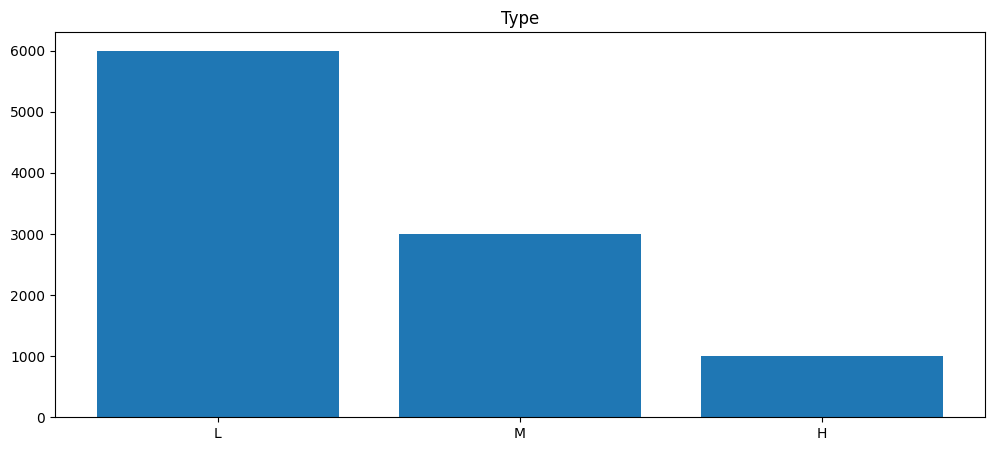

L    6000
M    2997
H    1003
Name: Type, dtype: int64


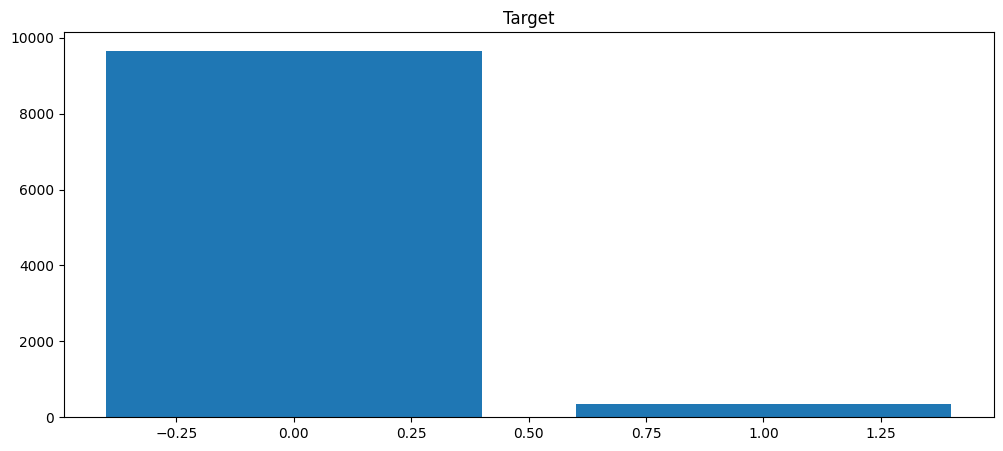

0    9661
1     339
Name: Target, dtype: int64


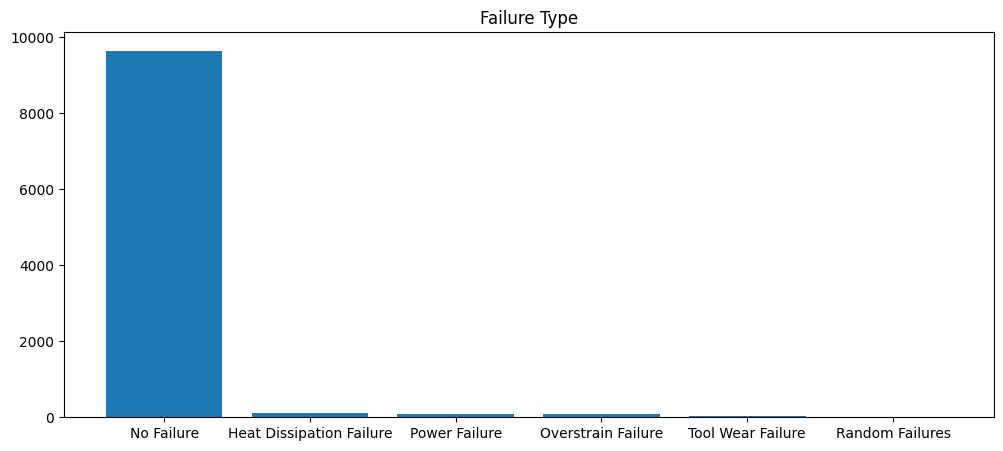

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [3]:
def BarPlot(ColName):
    feature = df[ColName]
    plt.figure(figsize=(12,5))
    plt.title(ColName)
    plt.bar(feature.value_counts().index,feature.value_counts())
    plt.show()
    print(feature.value_counts())

ColList = ['Type','Target','Failure Type']
for i in ColList:
    BarPlot(i)

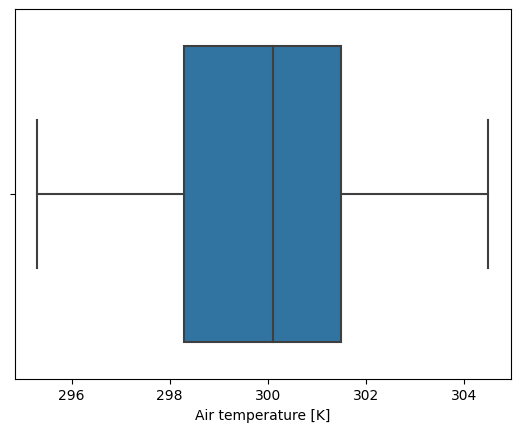

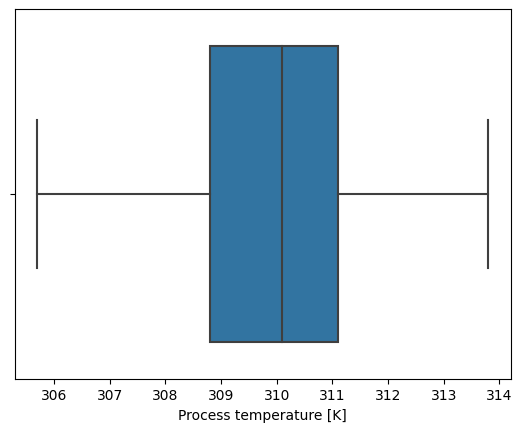

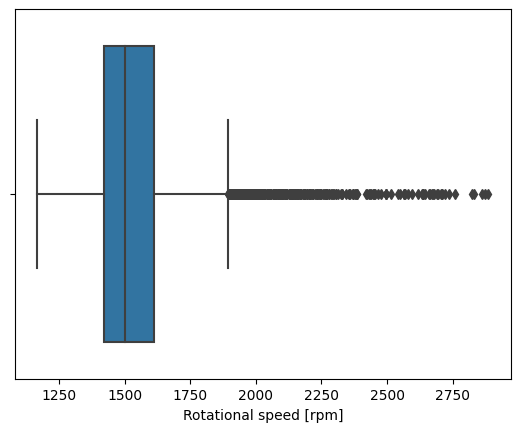

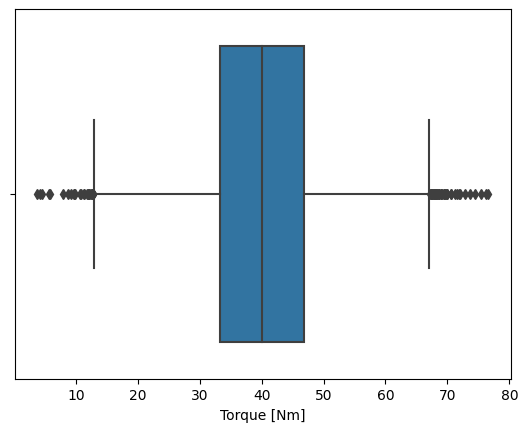

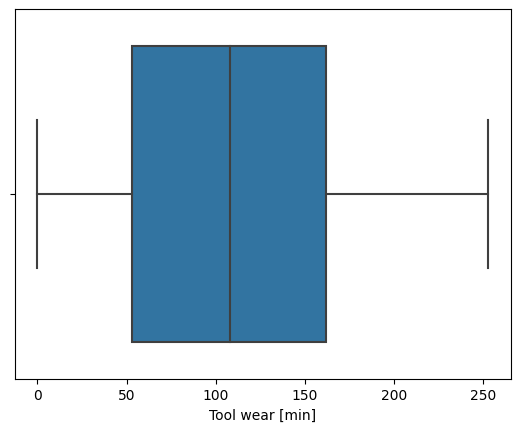

In [4]:
def BoxPlot(ColName):
    sns.boxplot(x=df[ColName])
    plt.show()
ColList = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
for i in ColList:
    BoxPlot(i)

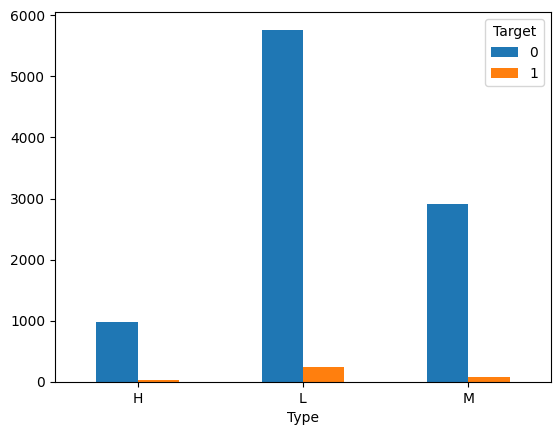

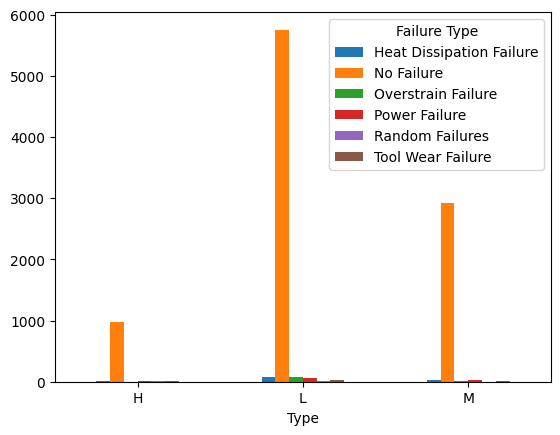

In [5]:
def CrossTab(ColName):
    pd.crosstab(df['Type'],df[ColName]).plot(kind='bar')
    plt.xticks(rotation=0)    
    plt.show()


ColList = ['Target','Failure Type']
for i in ColList:
    CrossTab(i)

<AxesSubplot: xlabel='Target'>

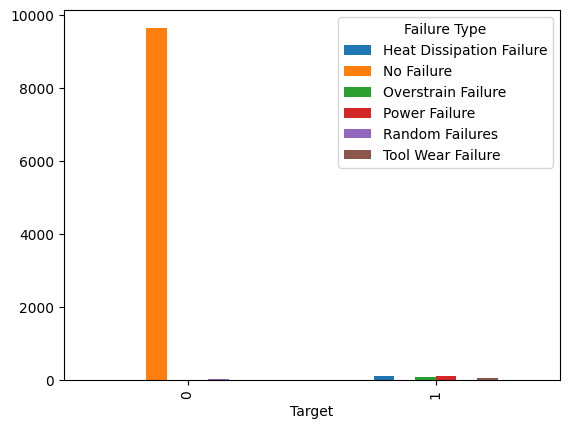

In [6]:
pd.crosstab(df['Target'],df['Failure Type']).plot(kind='bar')

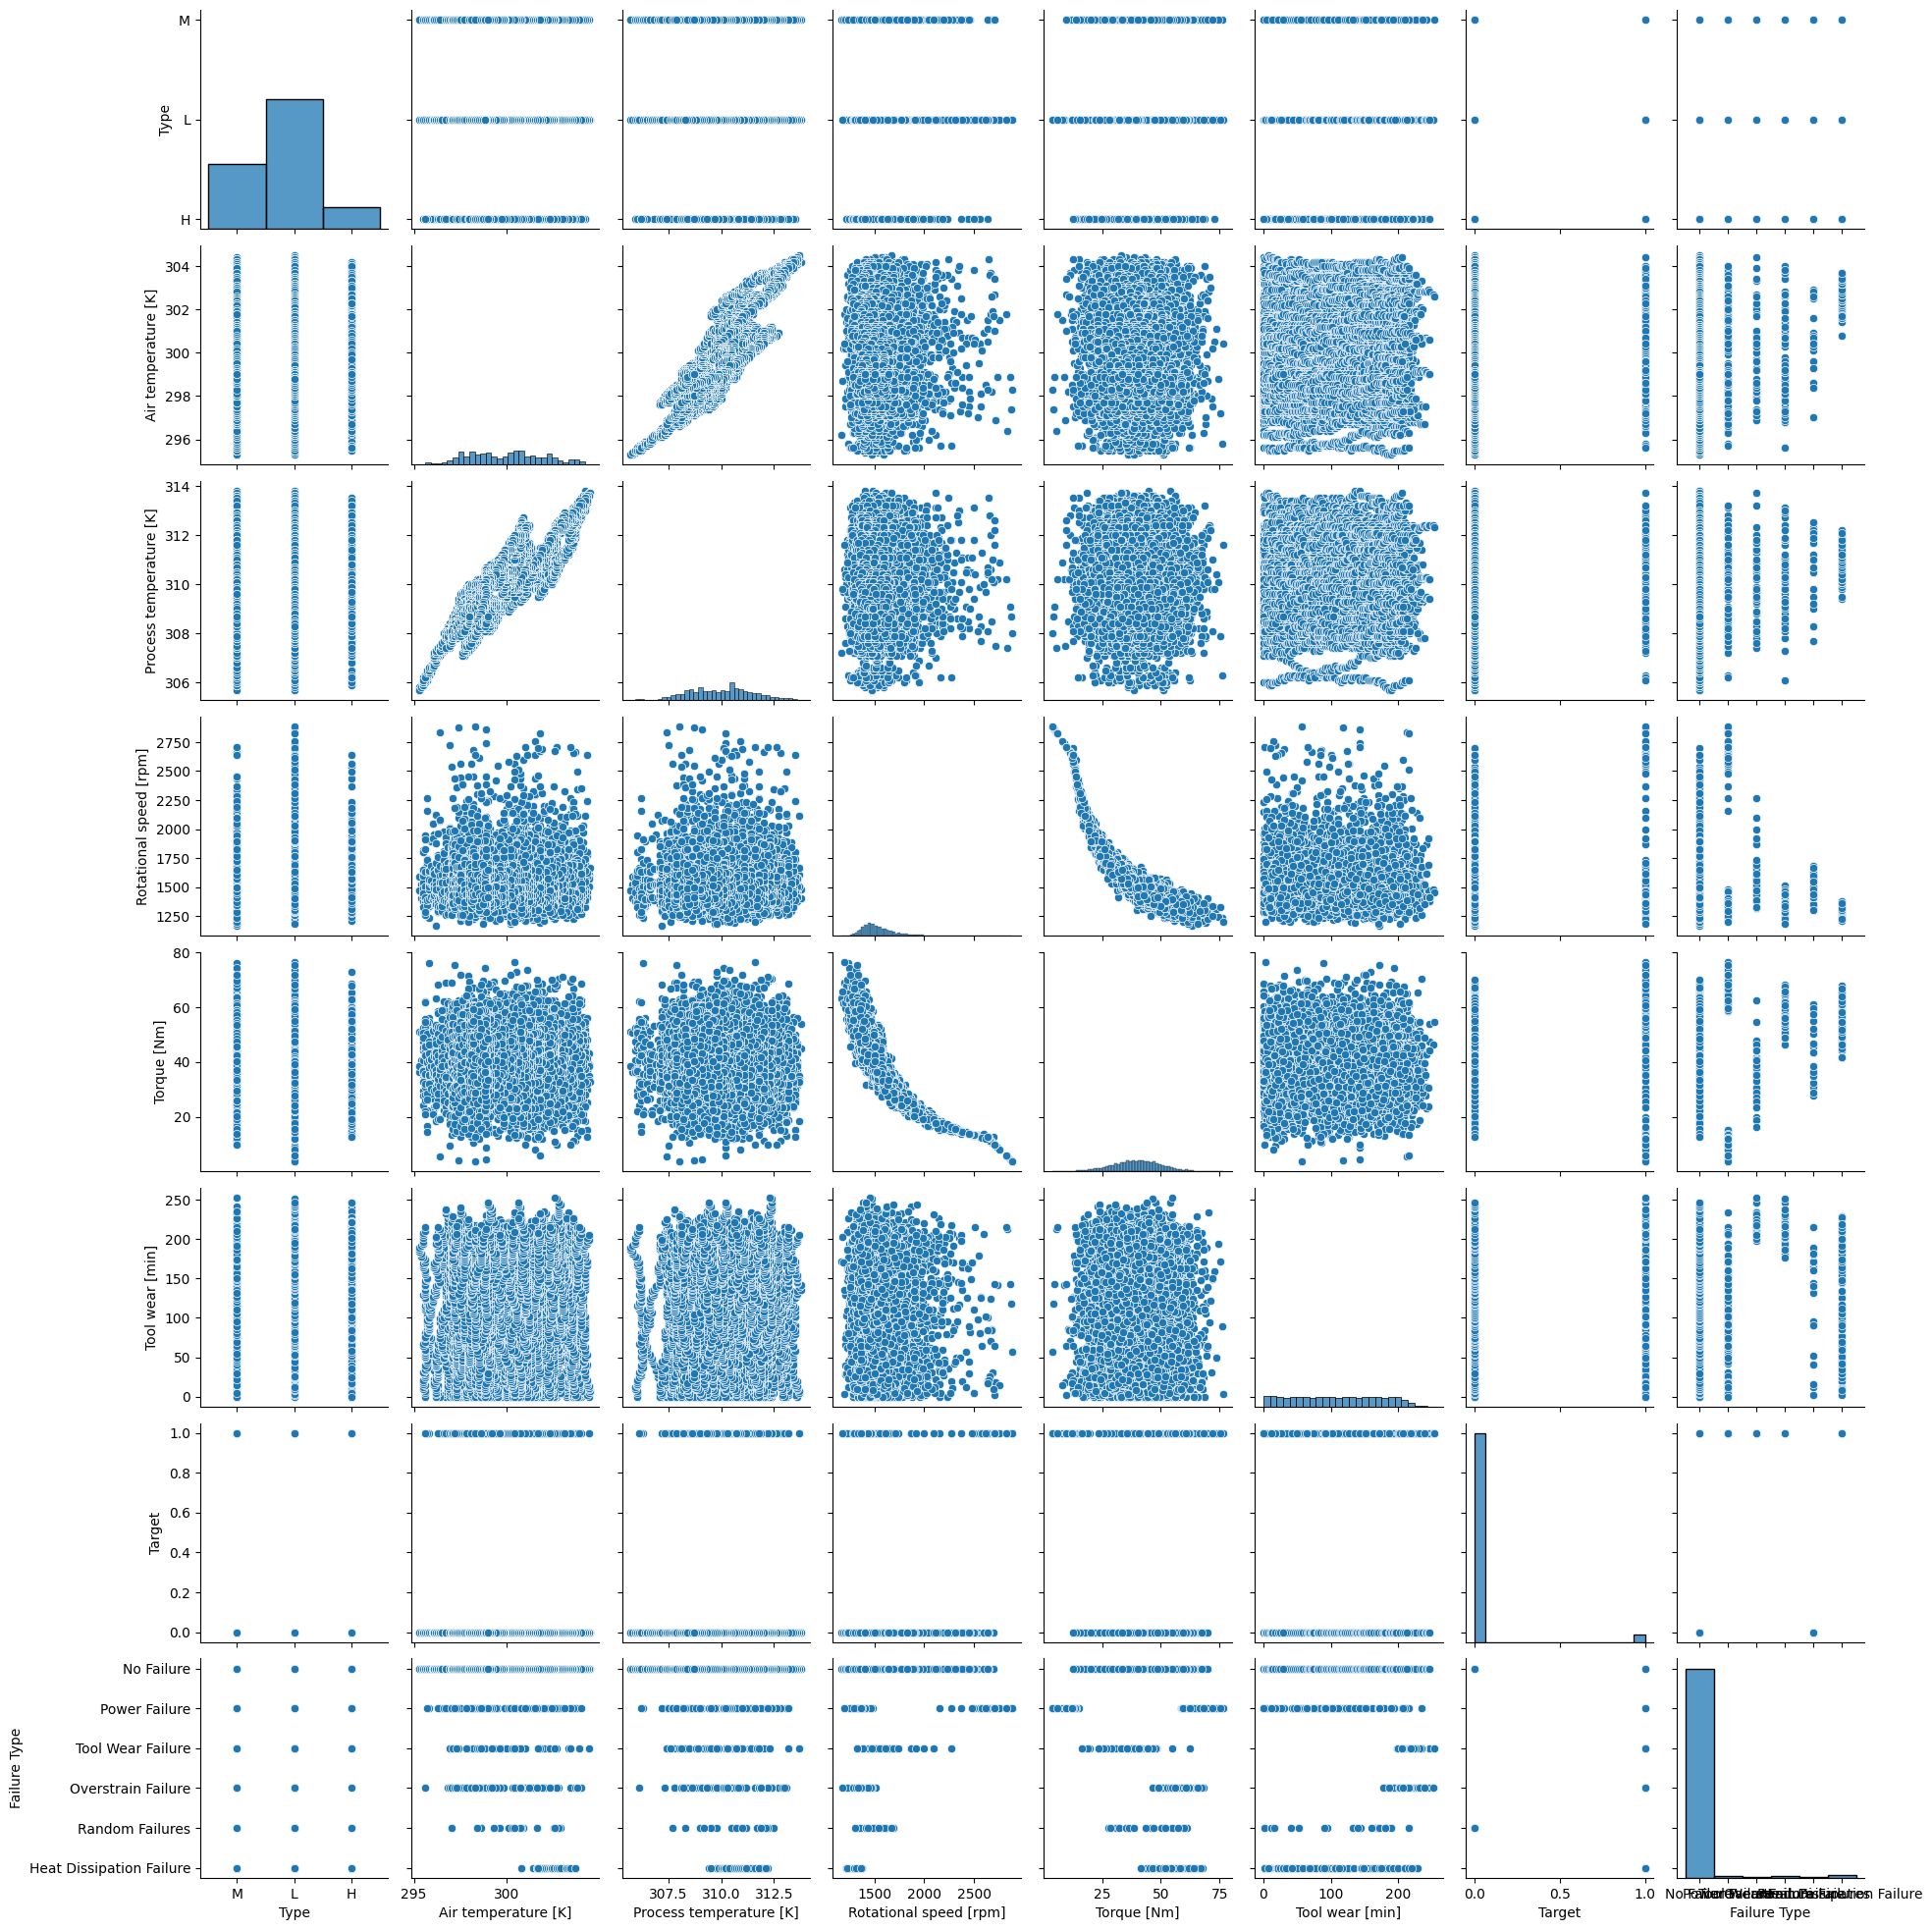

In [7]:
sns.pairplot(df, vars=['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Target','Failure Type'])

In [8]:
df[df['Failure Type'] == 'Random Failures']

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1221  1222     M16081    M                297.0                    308.3   
1302  1303     L48482    L                298.6                    309.8   
1748  1749     H31162    H                298.4                    307.7   
2072  2073     L49252    L                299.6                    309.5   
2559  2560     L49739    L                299.3                    309.0   
3065  3066     M17925    M                300.1                    309.2   
3452  3453     H32866    H                301.6                    310.5   
5471  5472     L52651    L                302.7                    312.3   
5489  5490     L52669    L                302.6                    312.1   
5495  5496     H34909    H                302.9                    312.5   
5509  5510     L52689    L                302.8                    312.2   
5553  5554     L52733    L                302.5                    311.9   
5639  5640     L52819    L                302.6                    312.1   
6091  6092     L53271    L                300.9                    310.7   
6913  6914     L54093    L                300.8                    311.2   
6960  6961     L54140    L                300.7                    311.0   
7488  7489     L54668    L                300.3                    311.7   
7868  7869     H37282    H                300.4                    311.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
1221                    1399         46.4              132       0   
1302                    1505         45.7              144       0   
1748                    1626         31.1              166       0   
2072                    1570         35.5              189       0   
2559                    1447         50.4              140       0   
3065                    1687         27.7               95       0   
3452                    1602         32.3                2       0   
5471                    1346         61.2              170       0   
5489                    1499         35.0              215       0   
5495                    1357         55.0               12       0   
5509                    1509         36.5               52       0   
5553                    1306         59.7              172       0   
5639                    1668         28.7              180       0   
6091                    1412         57.5               16       0   
6913                    1481         38.5              181       0   
6960                    1413         52.0               91       0   
7488                    1545         43.5              160       0   
7868                    1438         46.7               41       0   

         Failure Type  
1221  Random Failures  
1302  Random Failures  
1748  Random Failures  
2072  Random Failures  
2559  Random Failures  
3065  Random Failures  
3452  Random Failures  
5471  Random Failures  
5489  Random Failures  
5495  Random Failures  
5509  Random Failures  
5553  Random Failures  
5639  Random Failures  
6091  Random Failures  
6913  Random Failures  
6960  Random Failures  
7488  Random Failures  
7868  Random Failures

In [9]:
df.loc[df['Failure Type']=='Random Failures','Target'] = 1

In [10]:
df[df['Failure Type'] == 'Random Failures']

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1221  1222     M16081    M                297.0                    308.3   
1302  1303     L48482    L                298.6                    309.8   
1748  1749     H31162    H                298.4                    307.7   
2072  2073     L49252    L                299.6                    309.5   
2559  2560     L49739    L                299.3                    309.0   
3065  3066     M17925    M                300.1                    309.2   
3452  3453     H32866    H                301.6                    310.5   
5471  5472     L52651    L                302.7                    312.3   
5489  5490     L52669    L                302.6                    312.1   
5495  5496     H34909    H                302.9                    312.5   
5509  5510     L52689    L                302.8                    312.2   
5553  5554     L52733    L                302.5                    311.9   
5639  5640     L52819    L                302.6                    312.1   
6091  6092     L53271    L                300.9                    310.7   
6913  6914     L54093    L                300.8                    311.2   
6960  6961     L54140    L                300.7                    311.0   
7488  7489     L54668    L                300.3                    311.7   
7868  7869     H37282    H                300.4                    311.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
1221                    1399         46.4              132       1   
1302                    1505         45.7              144       1   
1748                    1626         31.1              166       1   
2072                    1570         35.5              189       1   
2559                    1447         50.4              140       1   
3065                    1687         27.7               95       1   
3452                    1602         32.3                2       1   
5471                    1346         61.2              170       1   
5489                    1499         35.0              215       1   
5495                    1357         55.0               12       1   
5509                    1509         36.5               52       1   
5553                    1306         59.7              172       1   
5639                    1668         28.7              180       1   
6091                    1412         57.5               16       1   
6913                    1481         38.5              181       1   
6960                    1413         52.0               91       1   
7488                    1545         43.5              160       1   
7868                    1438         46.7               41       1   

         Failure Type  
1221  Random Failures  
1302  Random Failures  
1748  Random Failures  
2072  Random Failures  
2559  Random Failures  
3065  Random Failures  
3452  Random Failures  
5471  Random Failures  
5489  Random Failures  
5495  Random Failures  
5509  Random Failures  
5553  Random Failures  
5639  Random Failures  
6091  Random Failures  
6913  Random Failures  
6960  Random Failures  
7488  Random Failures  
7868  Random Failures

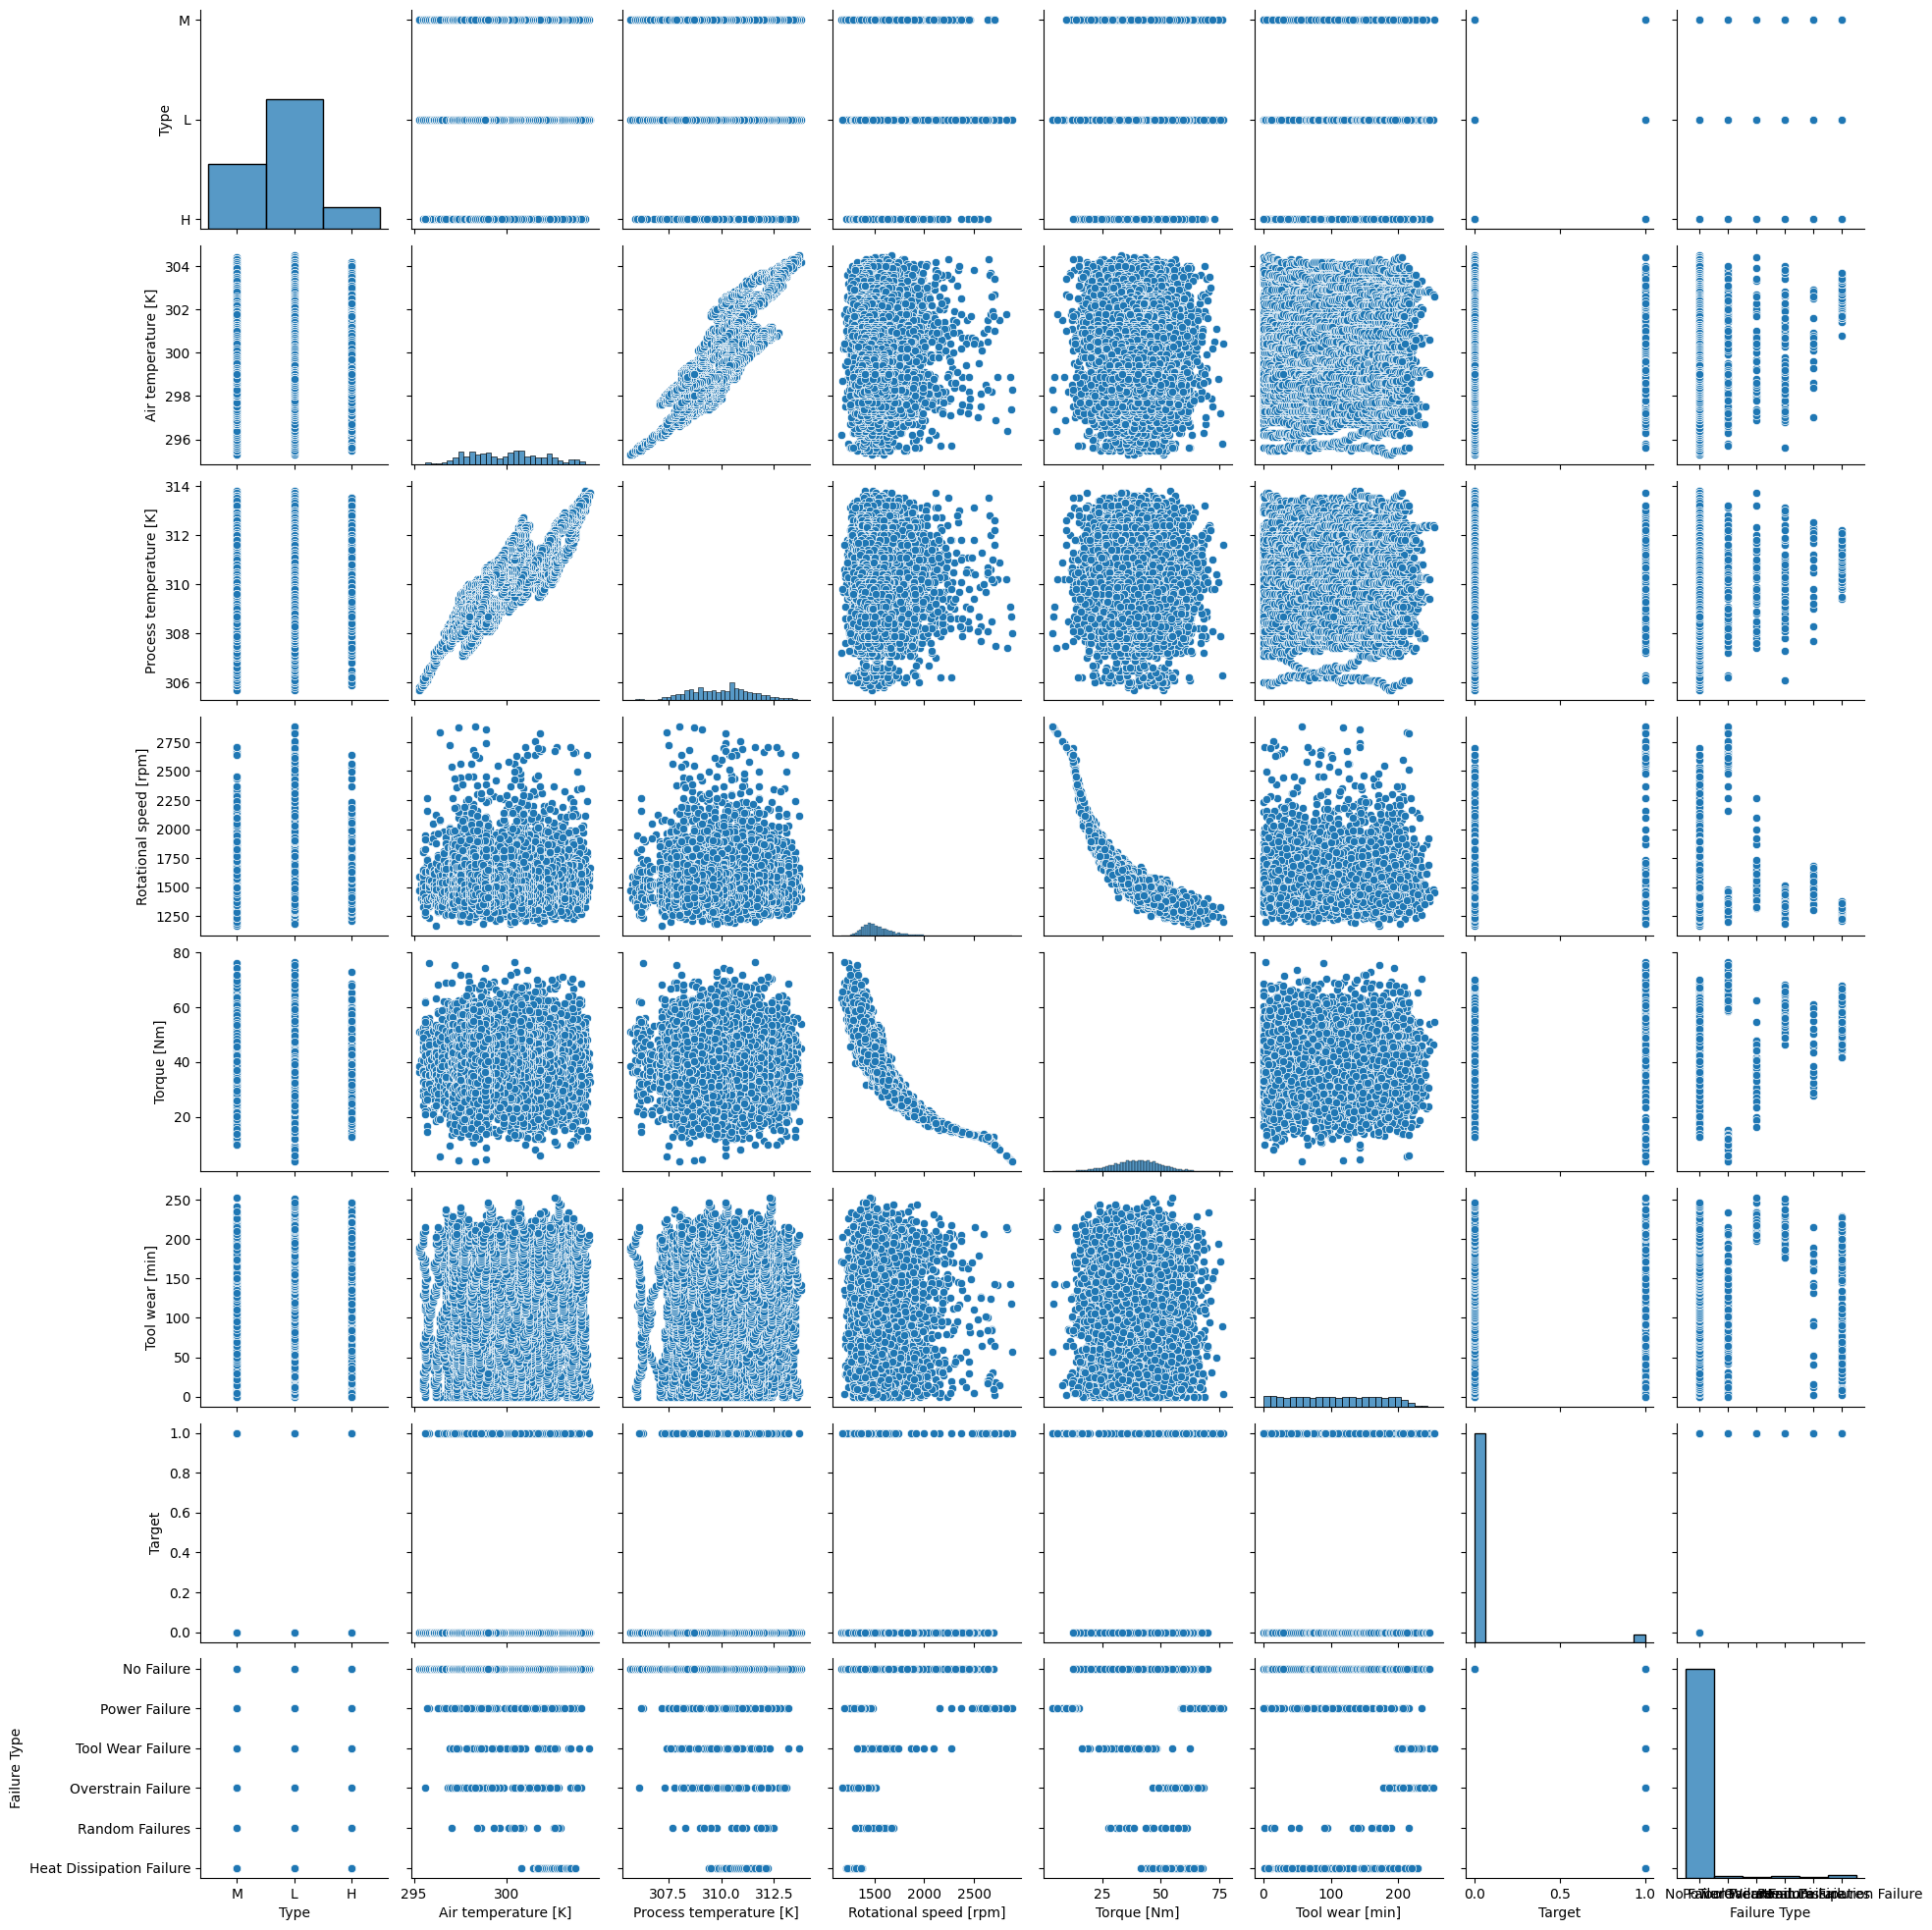

In [11]:
sns.pairplot(df,vars=['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Target','Failure Type'])

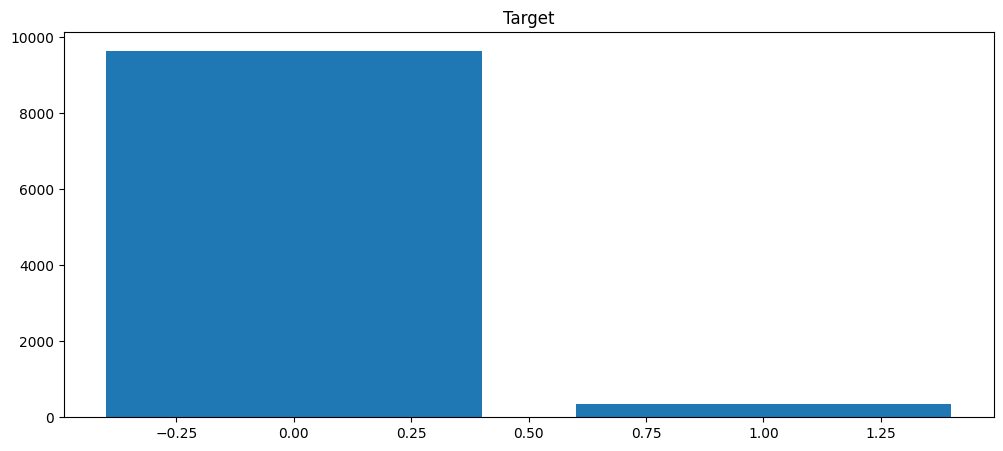

0    9643
1     357
Name: Target, dtype: int64


In [12]:
BarPlot('Target')

In [13]:
df = pd.get_dummies(df, columns=['Type'])
df

UDI Product ID  Air temperature [K]  Process temperature [K]  \
0         1     M14860                298.1                    308.6   
1         2     L47181                298.2                    308.7   
2         3     L47182                298.1                    308.5   
3         4     L47183                298.2                    308.6   
4         5     L47184                298.2                    308.7   
...     ...        ...                  ...                      ...   
9995   9996     M24855                298.8                    308.4   
9996   9997     H39410                298.9                    308.4   
9997   9998     M24857                299.0                    308.6   
9998   9999     H39412                299.0                    308.7   
9999  10000     M24859                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  Type_H  Type_L  Type_M  
0      No Failure       0       0       1  
1      No Failure       0       1       0  
2      No Failure       0       1       0  
3      No Failure       0       1       0  
4      No Failure       0       1       0  
...           ...     ...     ...     ...  
9995   No Failure       0       0       1  
9996   No Failure       1       0       0  
9997   No Failure       0       0       1  
9998   No Failure       1       0       0  
9999   No Failure       0       0       1  

[10000 rows x 12 columns]

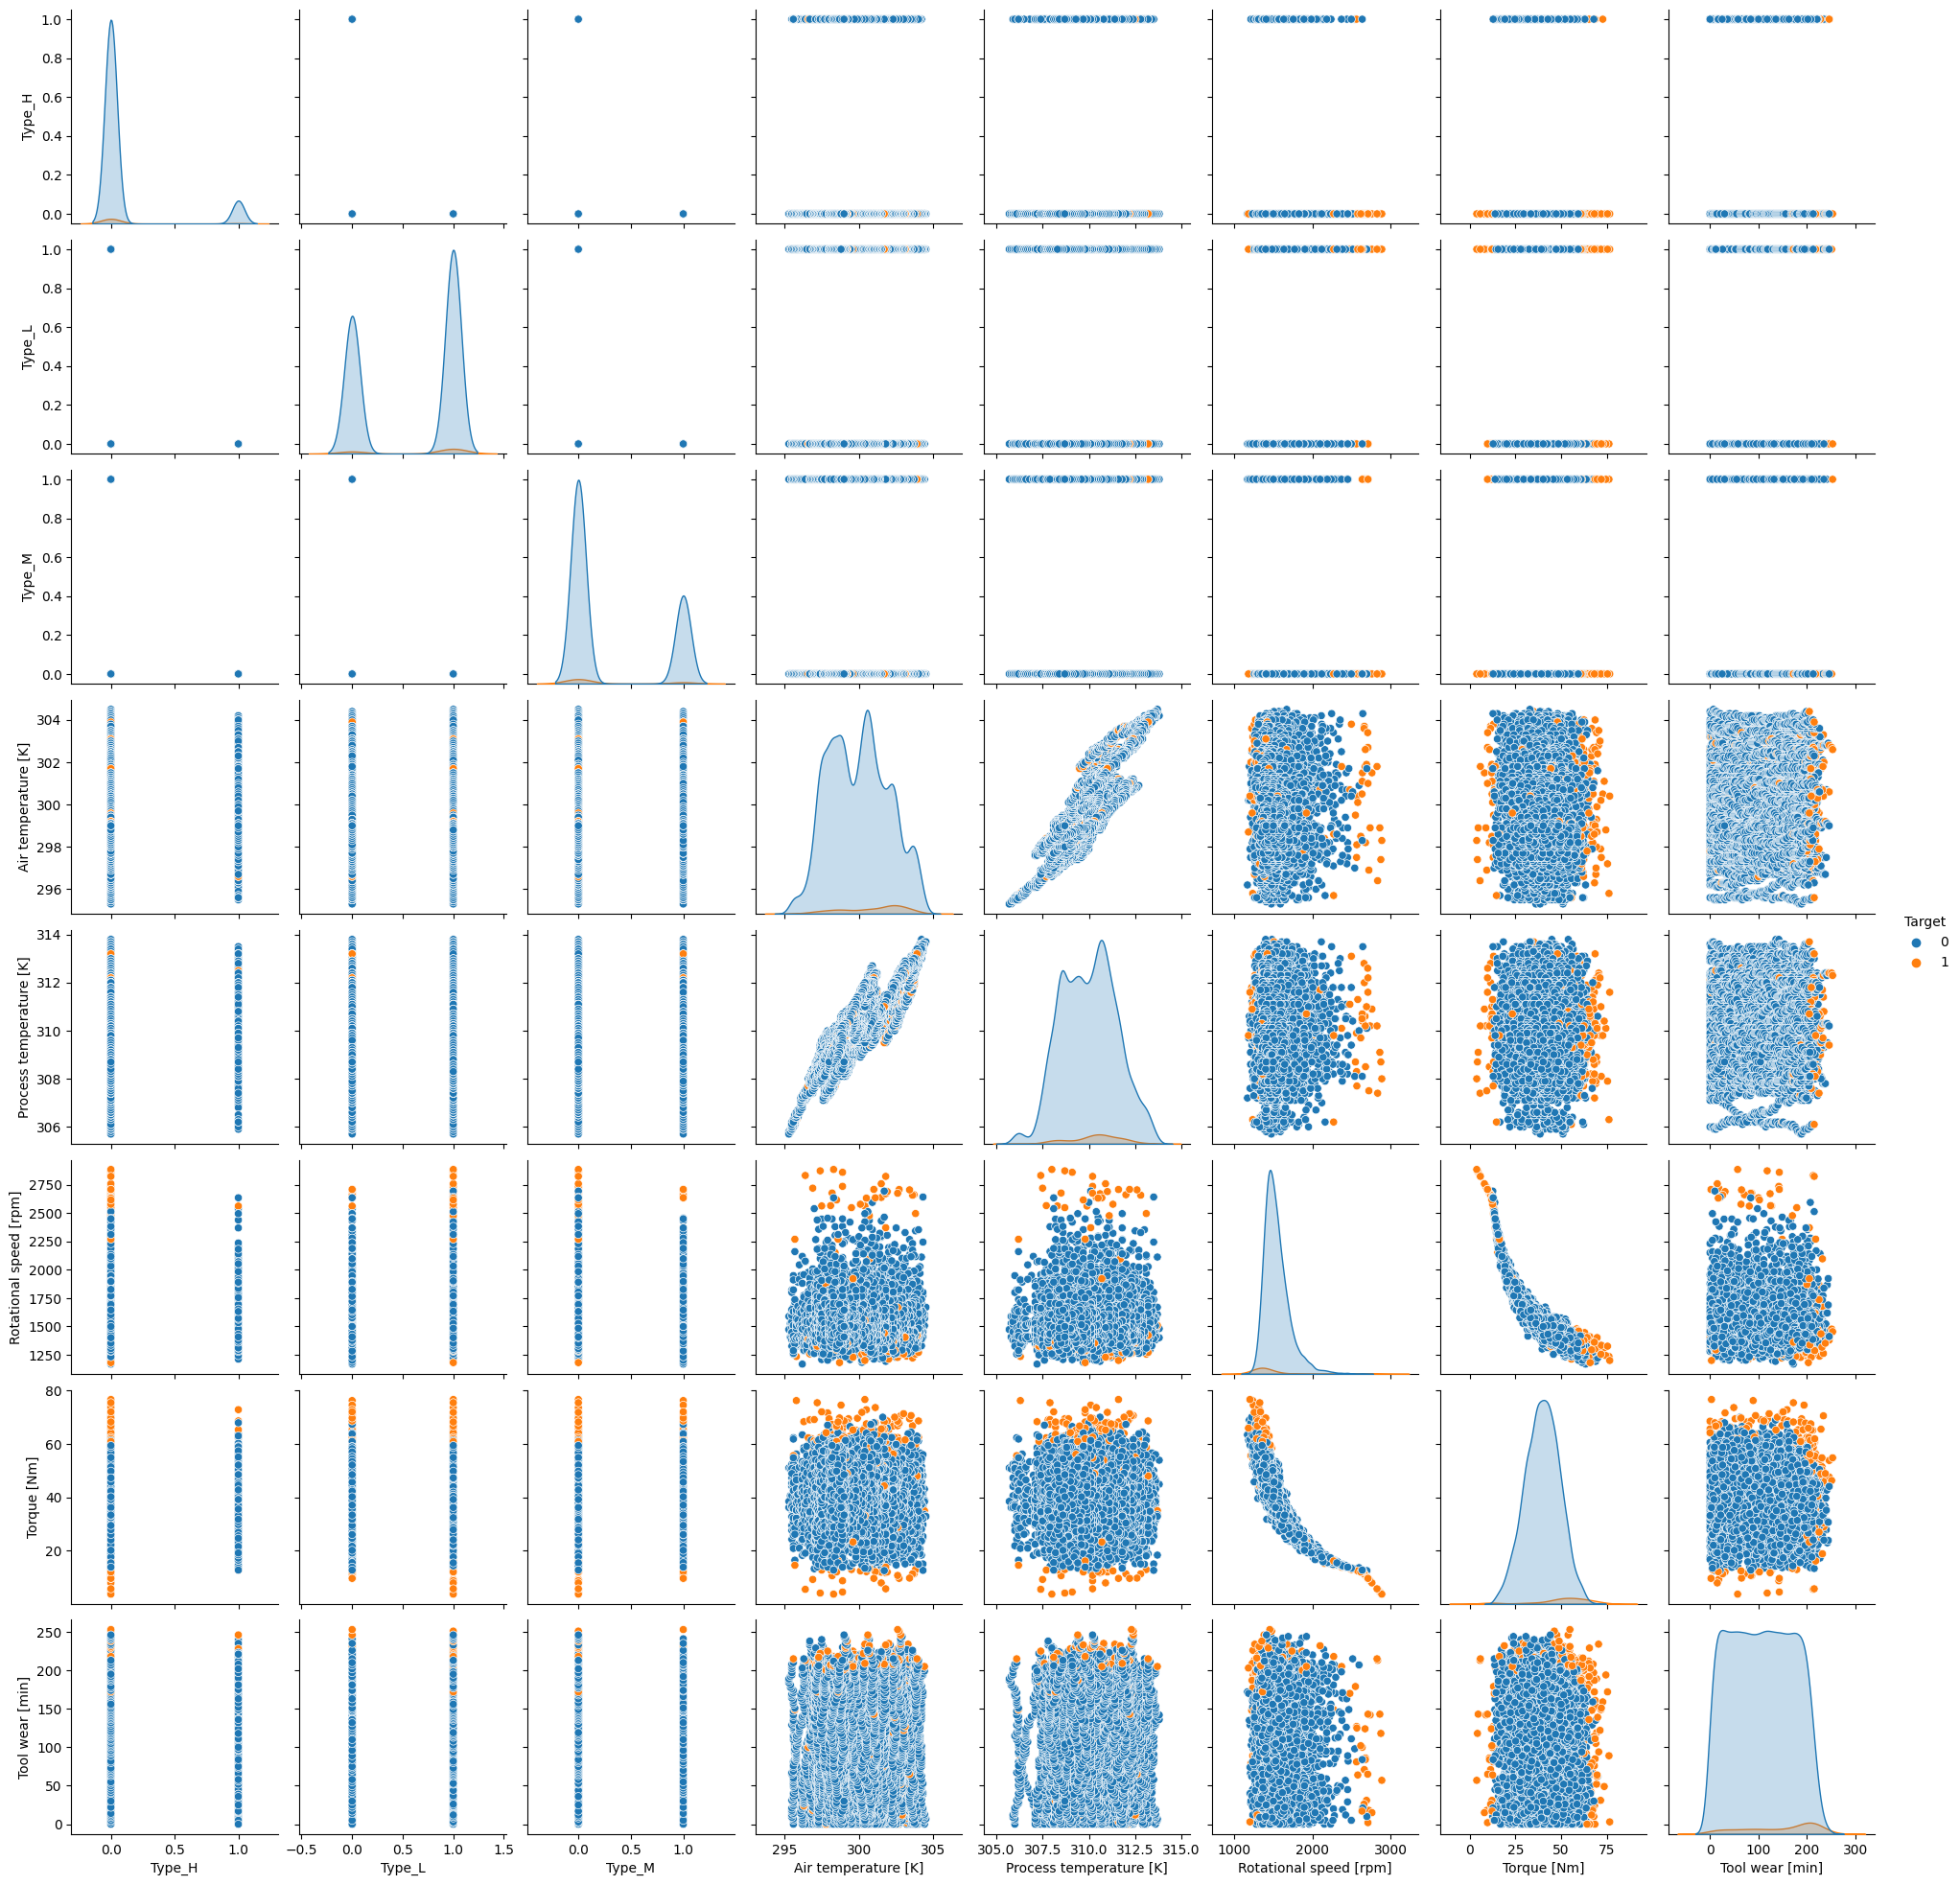

In [14]:
sns.pairplot(df,vars=['Type_H','Type_L','Type_M','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]'],hue='Target')
plt.show()

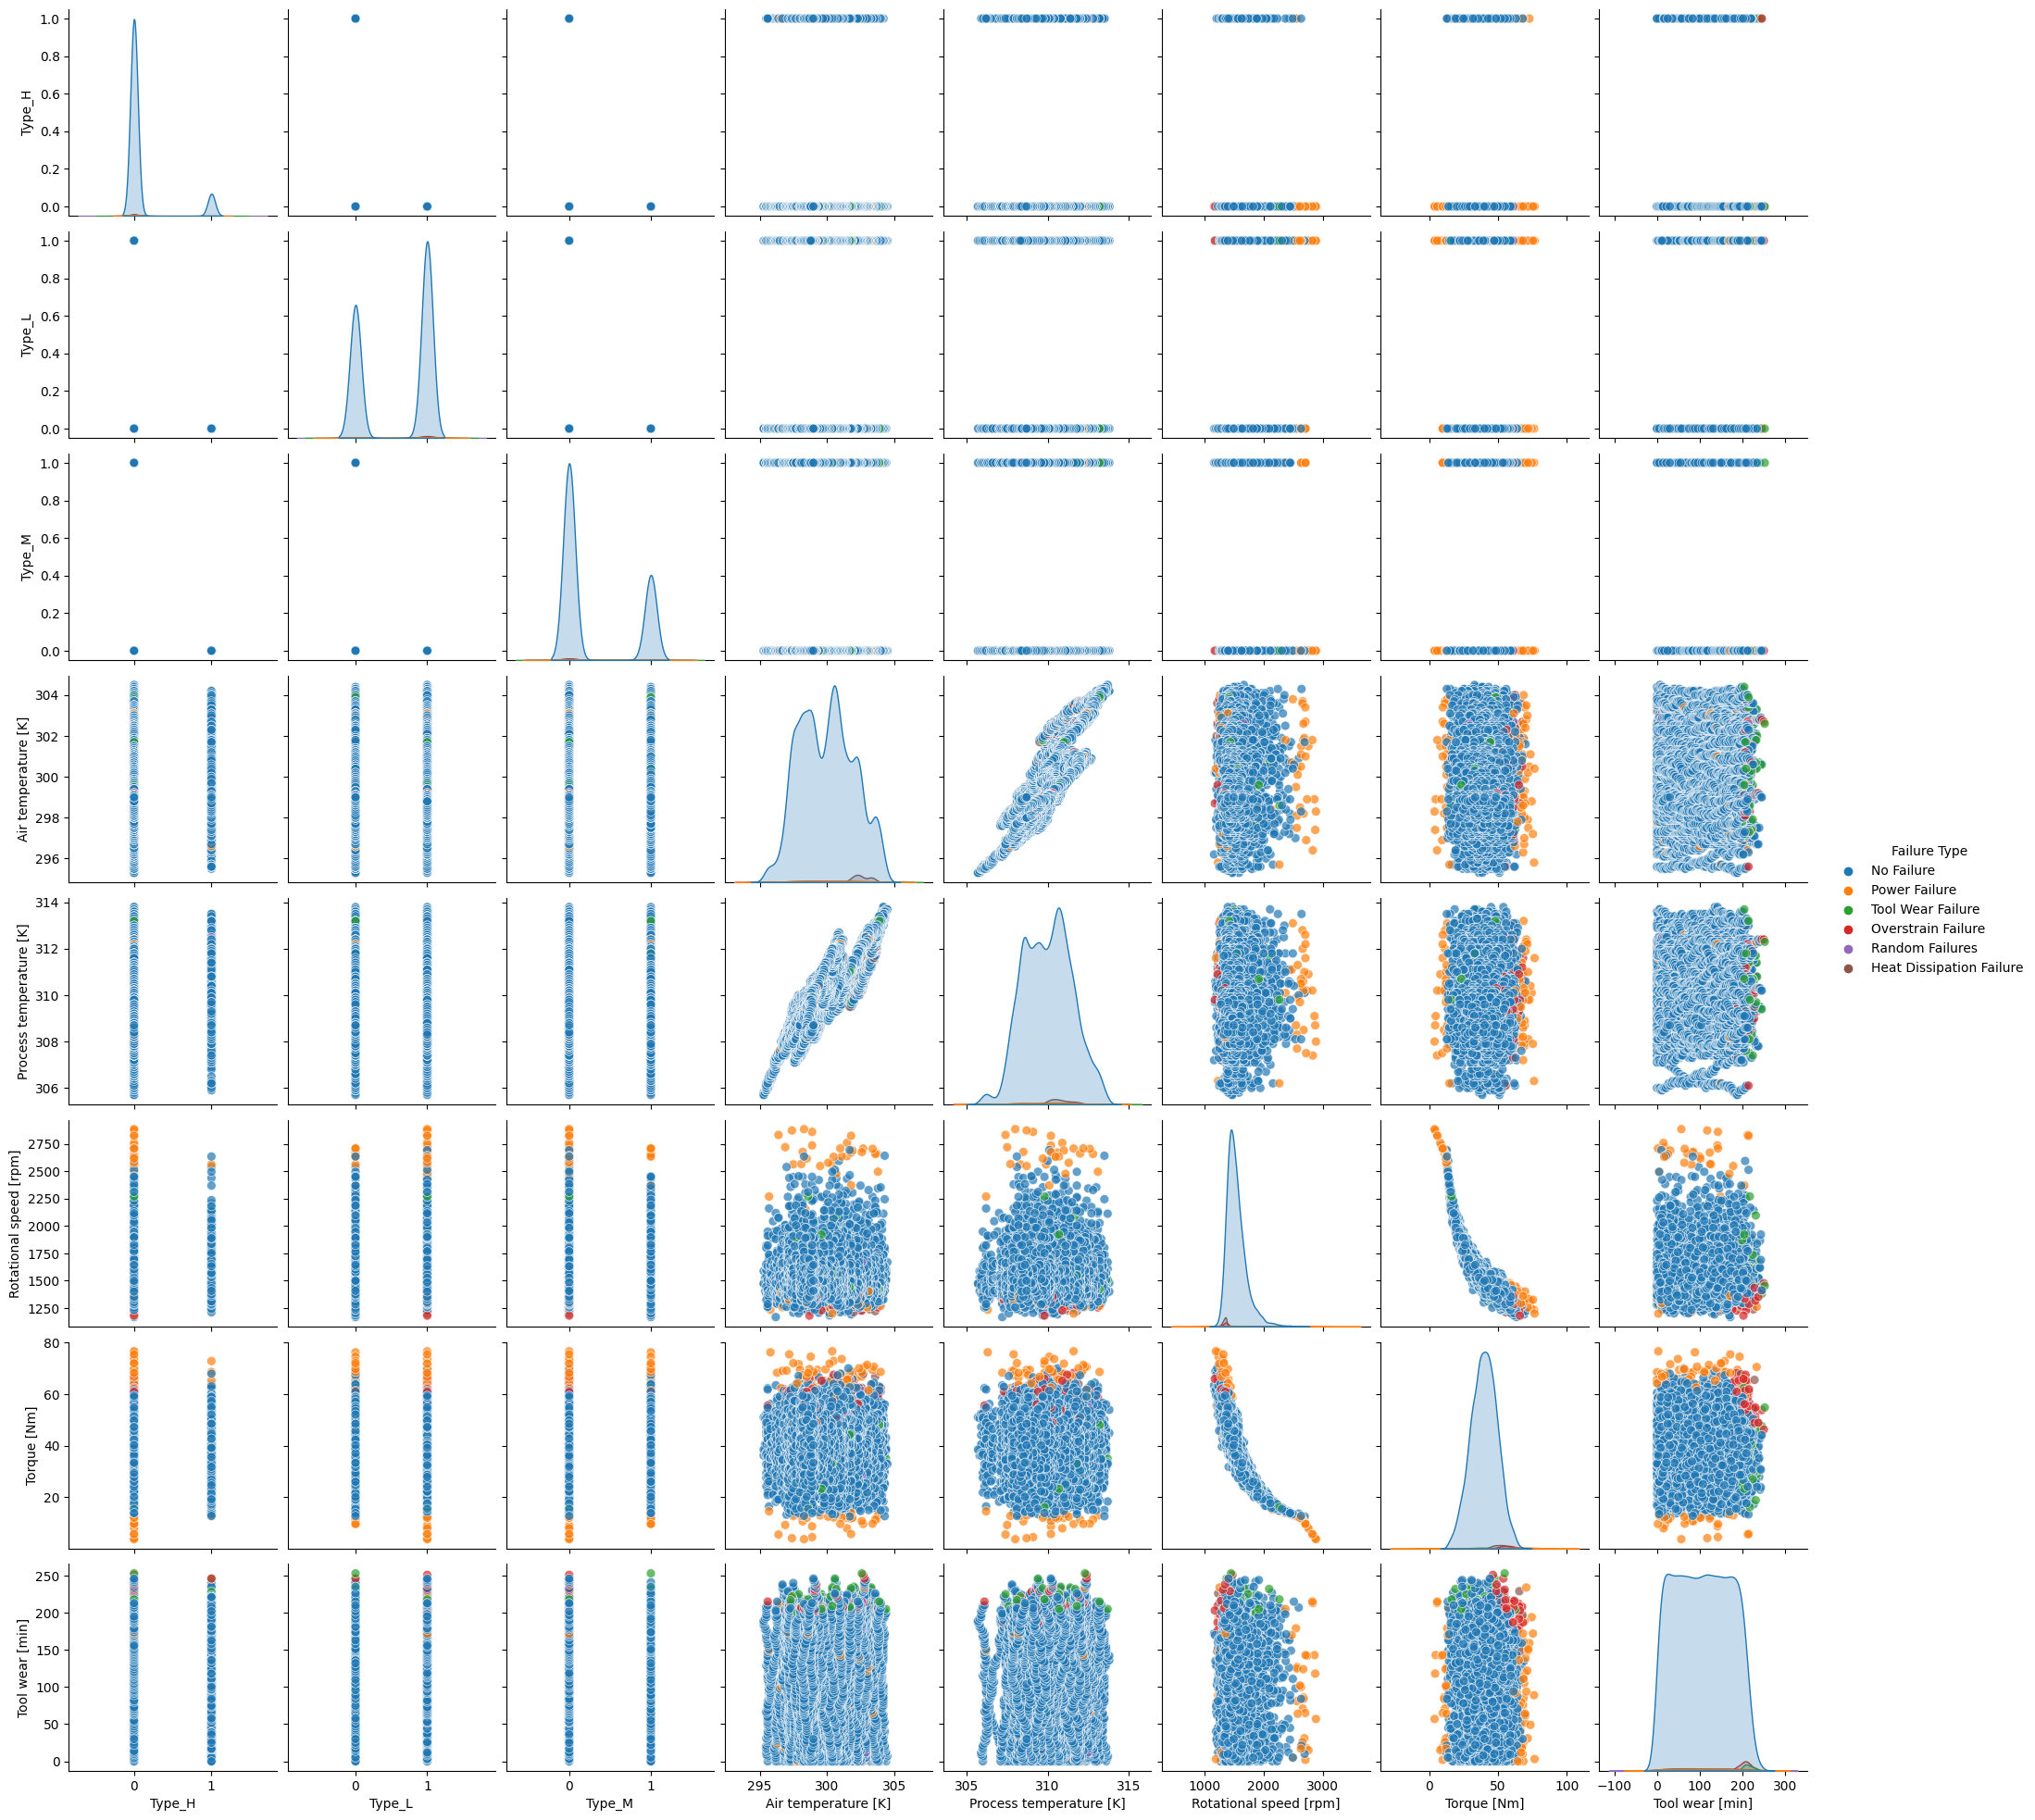

In [15]:
sns.pairplot(df,vars=['Type_H','Type_L','Type_M','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]'],hue='Failure Type',plot_kws={"s": 50, "alpha": 0.7})
plt.show()

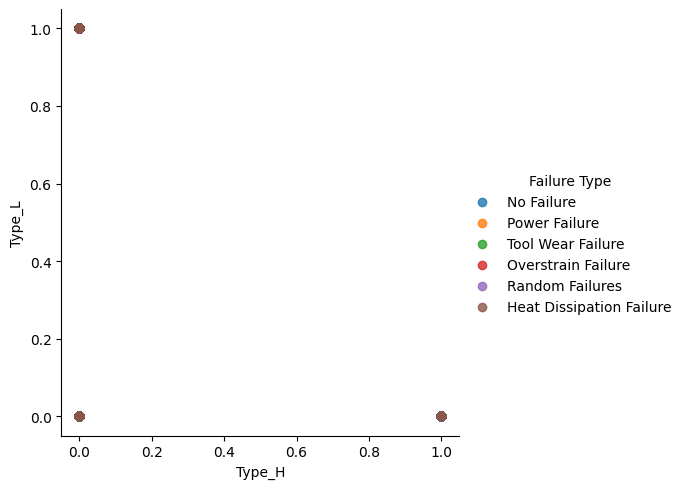

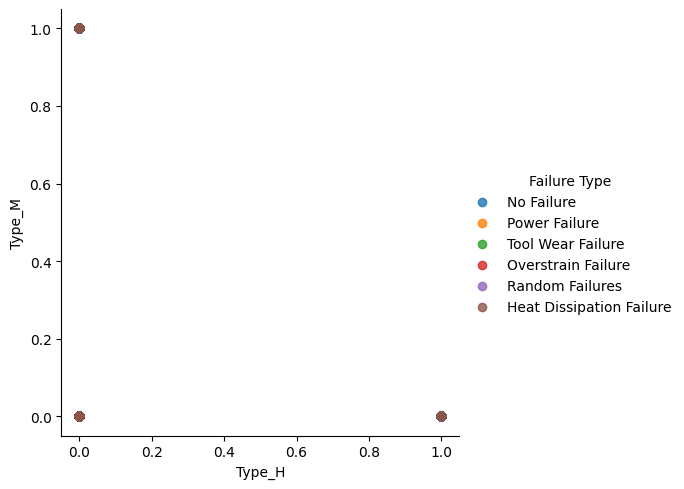

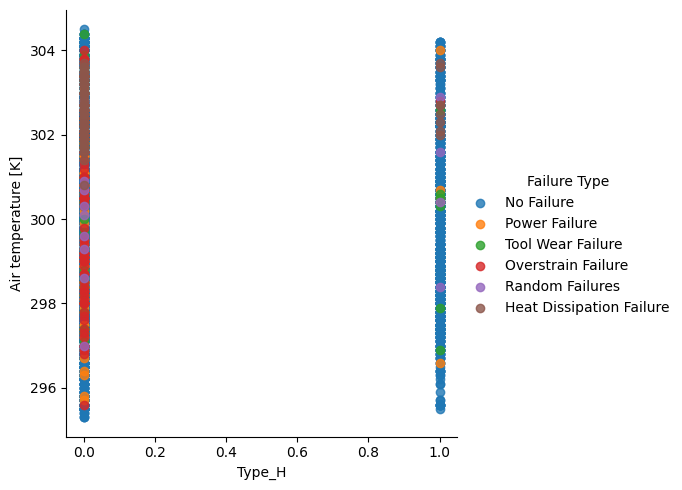

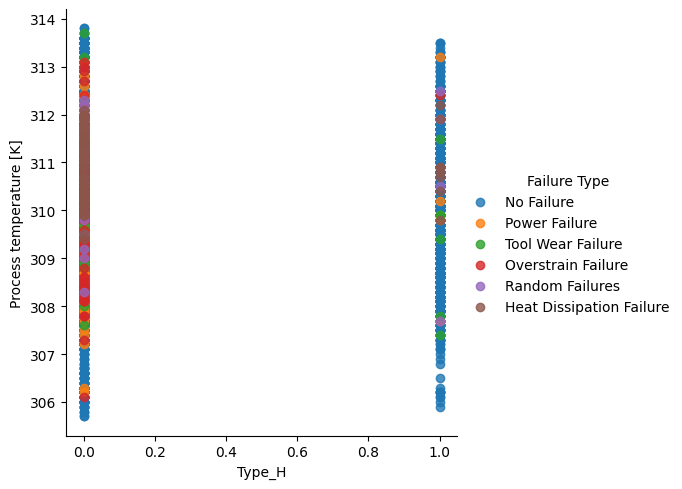

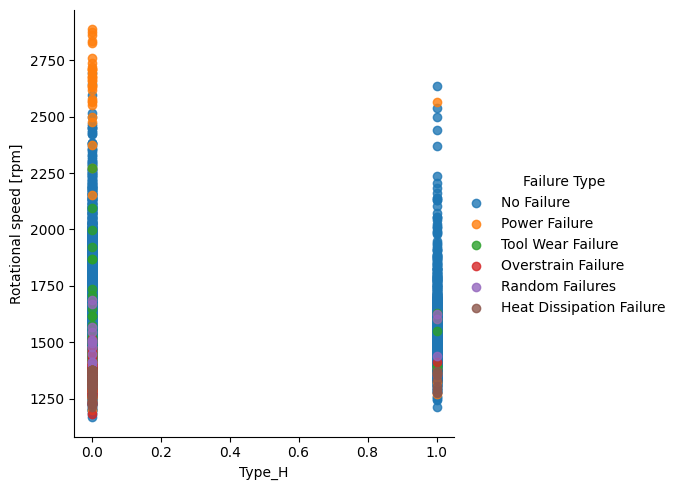

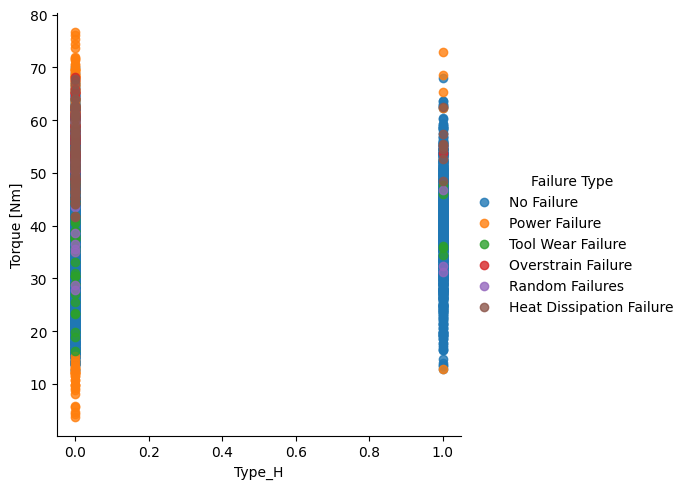

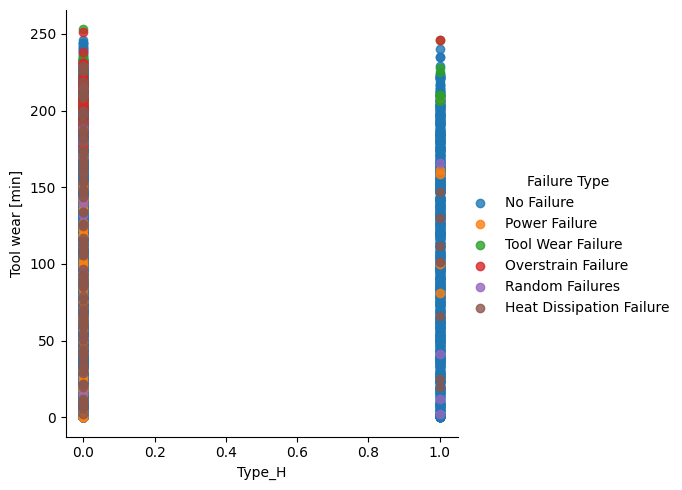

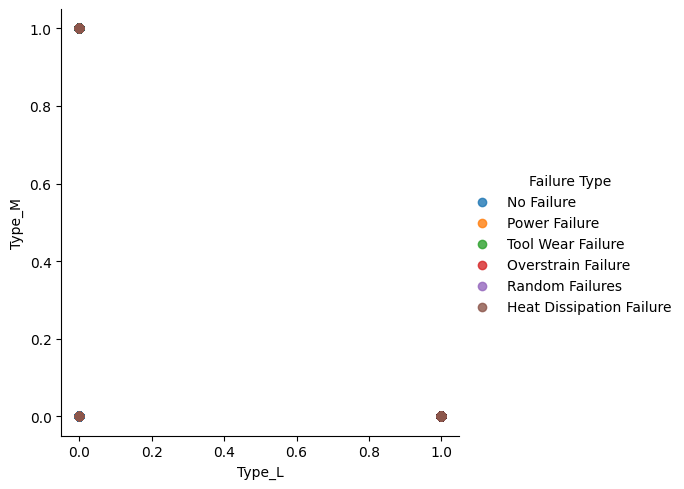

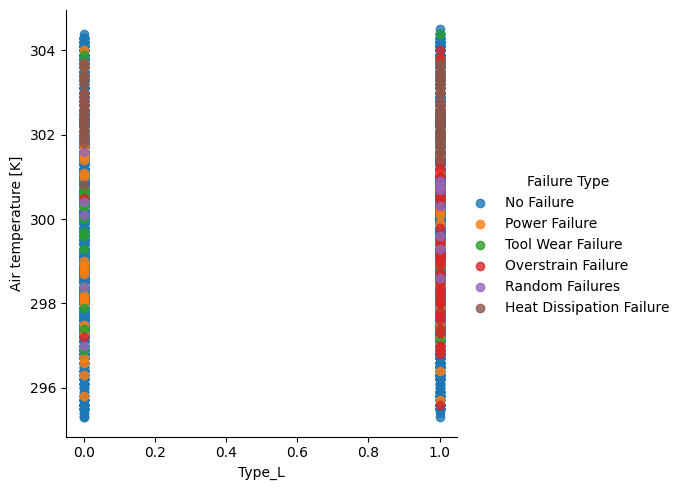

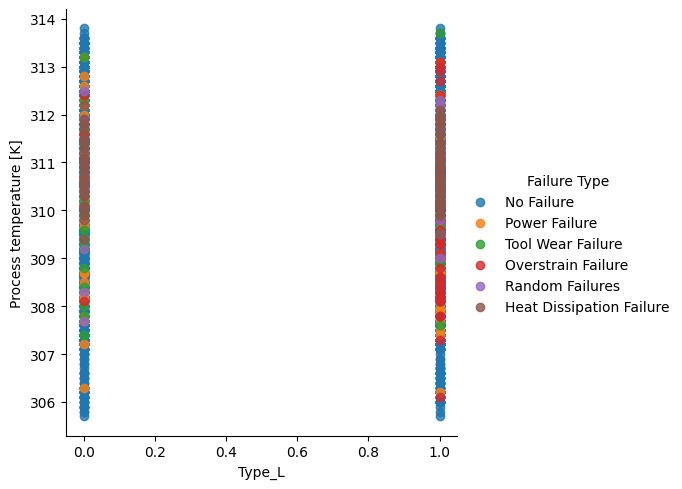

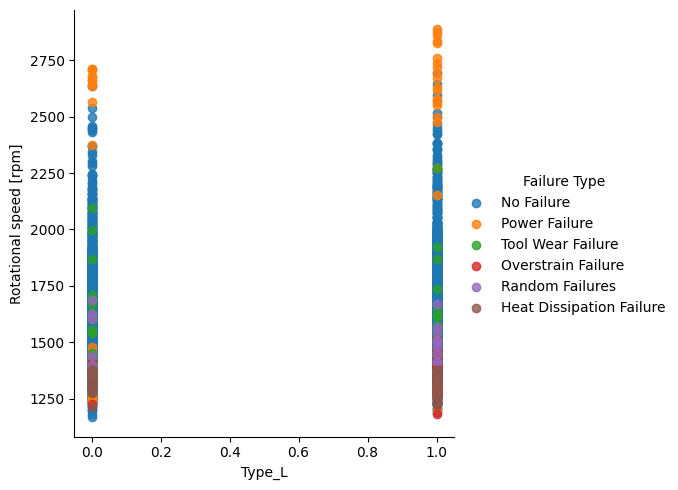

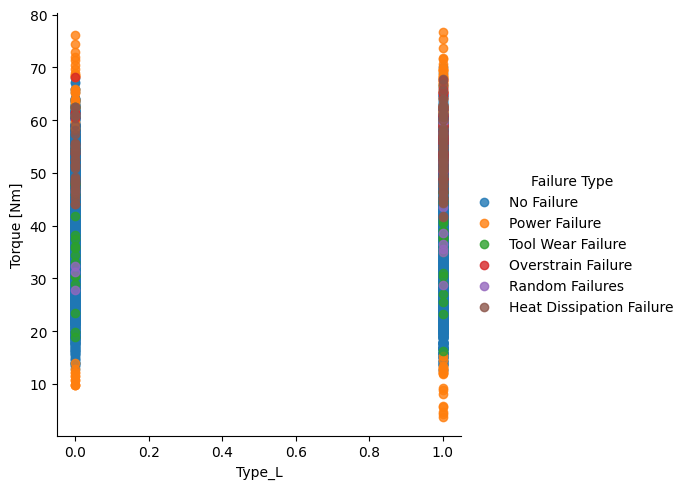

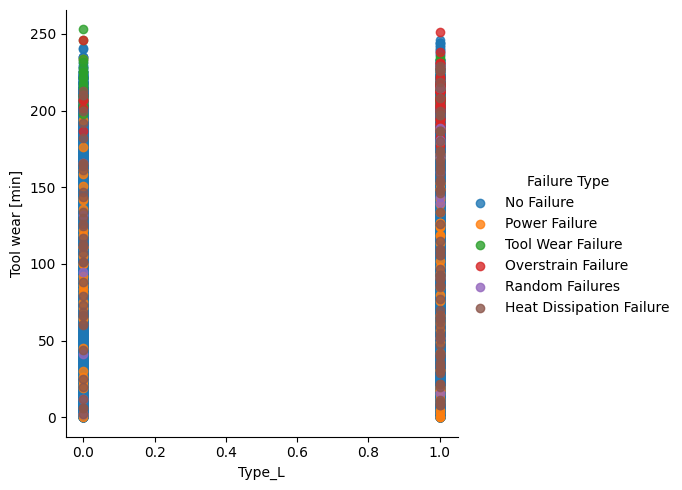

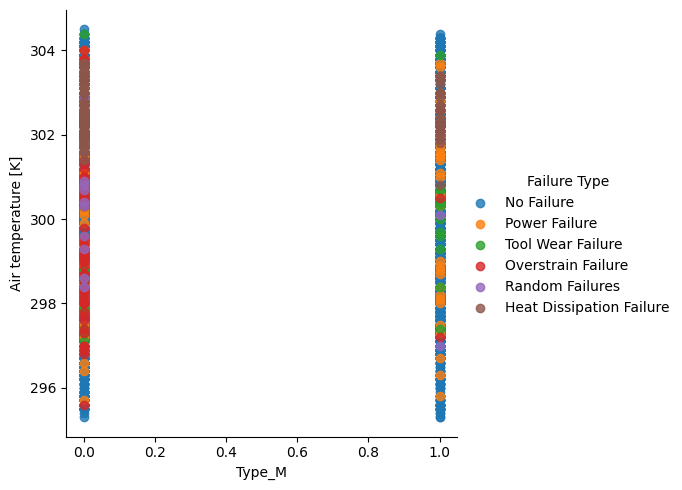

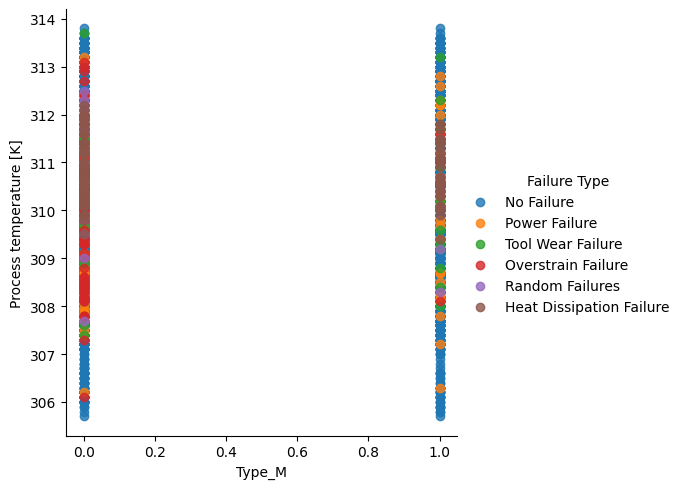

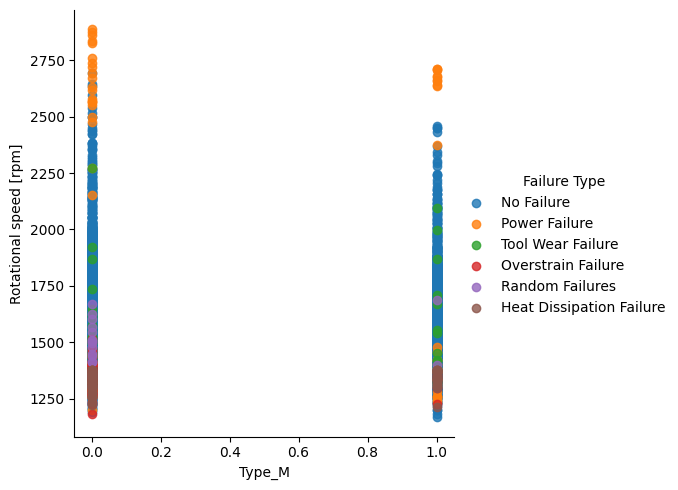

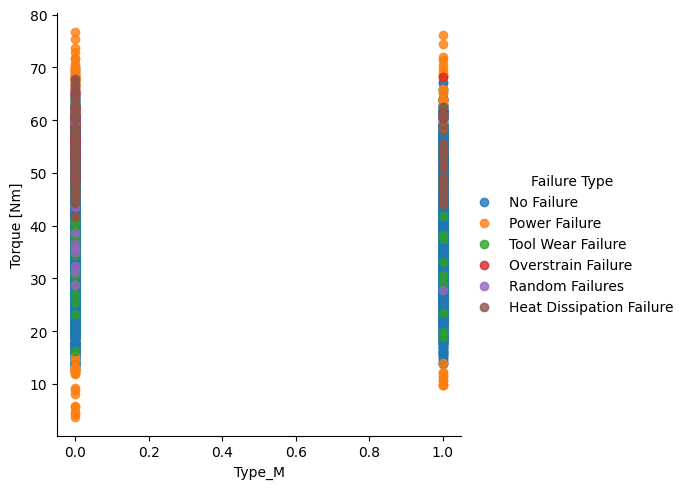

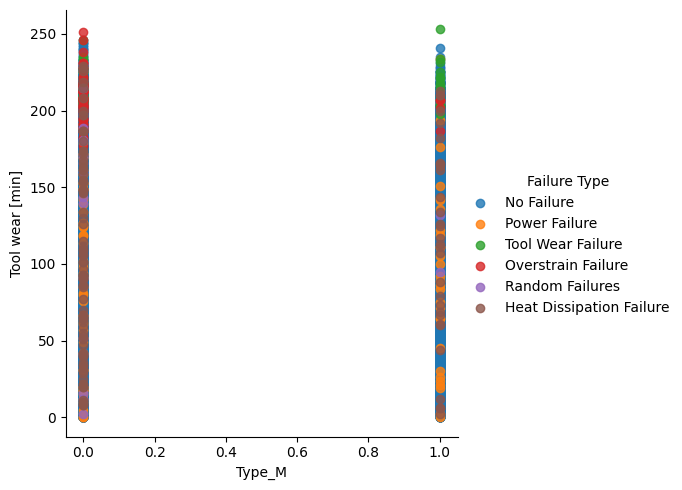

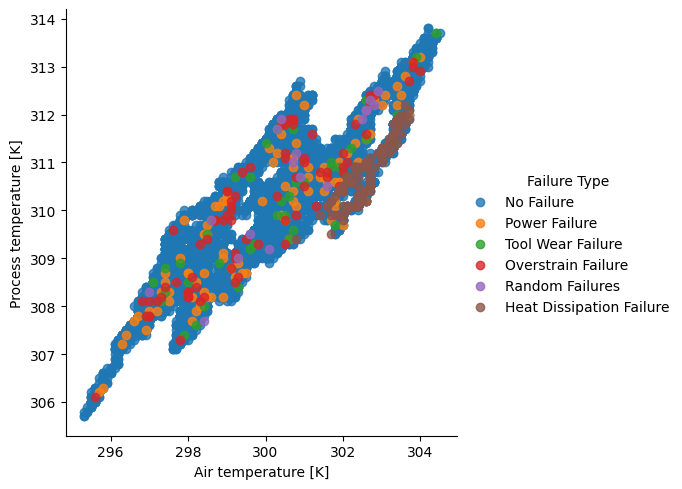

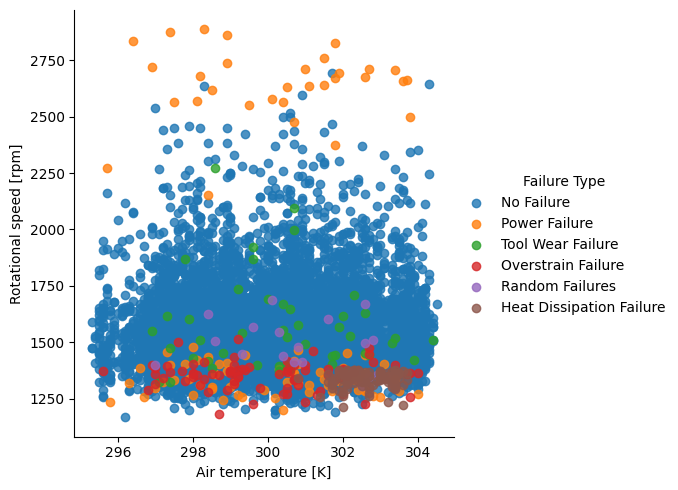

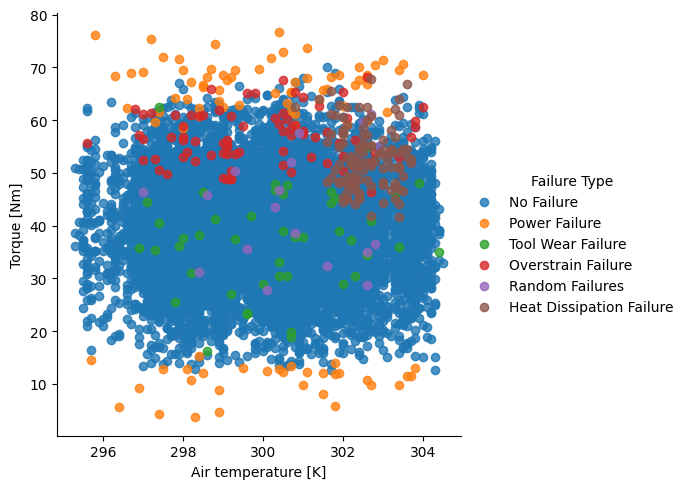

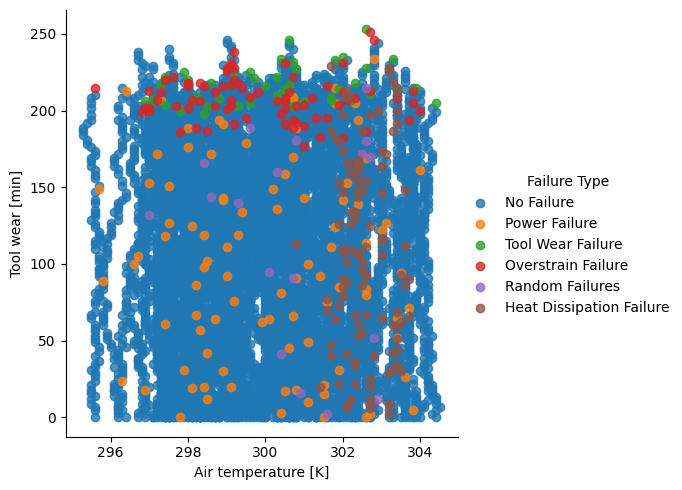

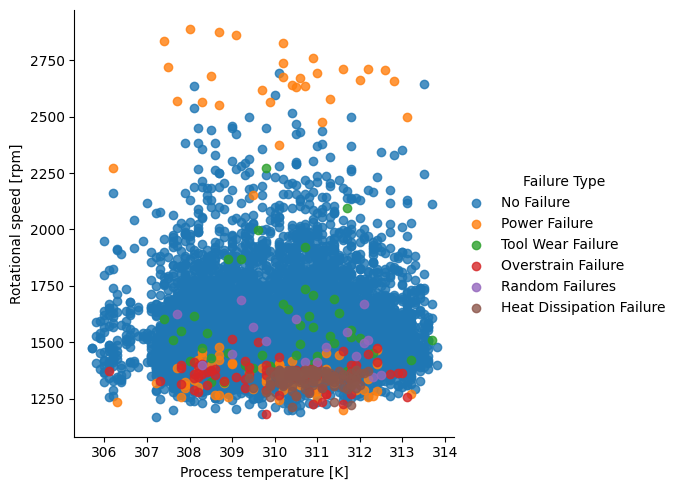

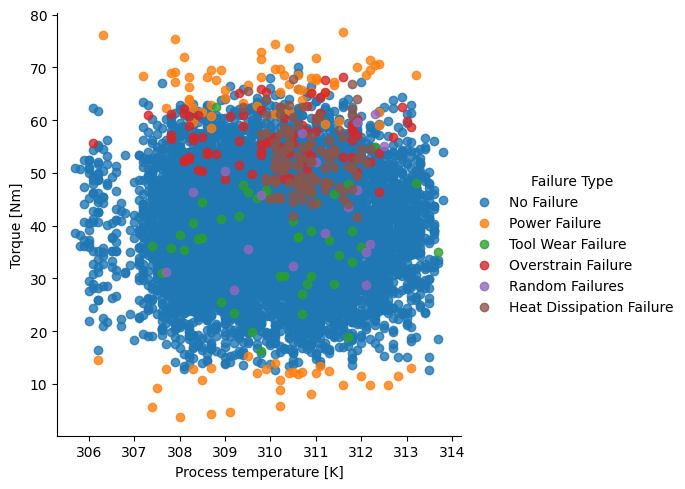

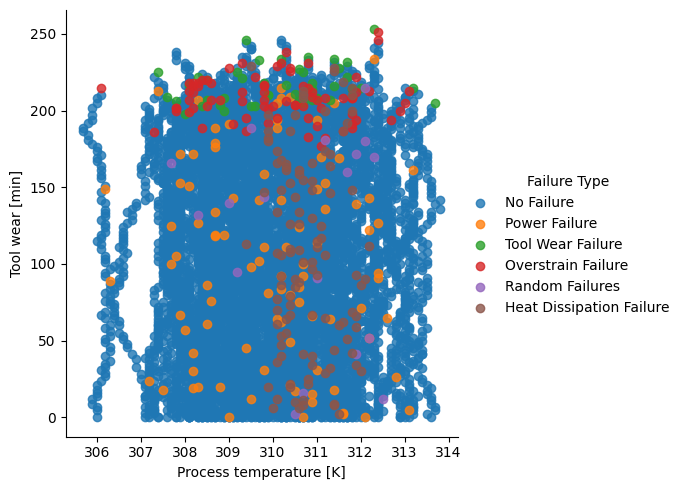

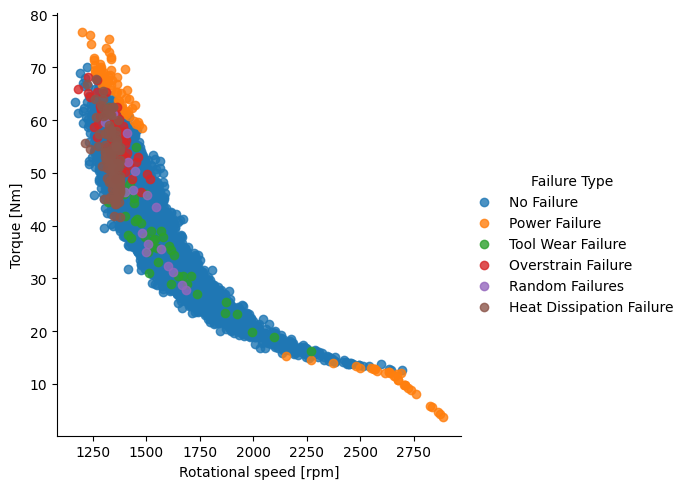

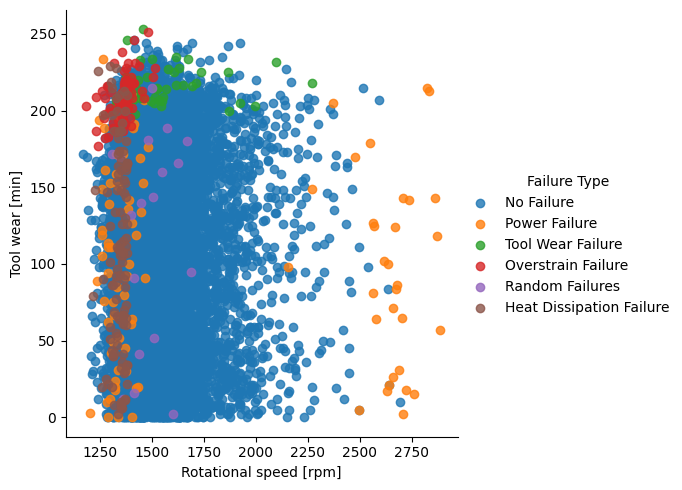

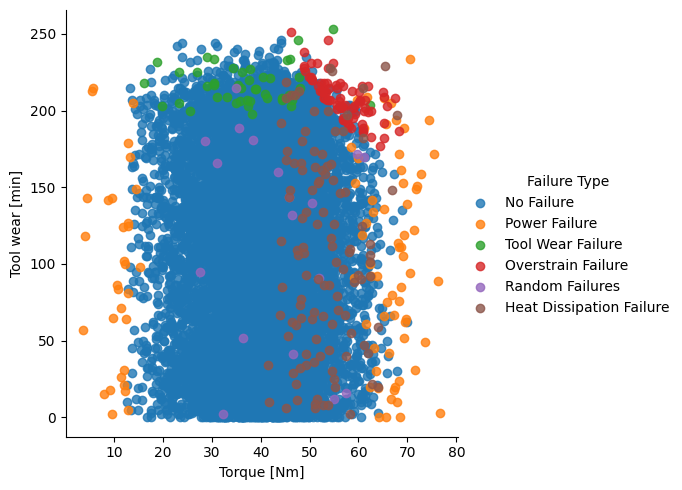

In [16]:
ColList = ['Type_H','Type_L','Type_M','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
FinishList=[]
for i in ColList:
    for j in ColList:
        if(i!=j):
            if((j in FinishList) == False):
                FinishList.append(i)
                sns.lmplot(data=df,x=i,y=j,hue='Failure Type',fit_reg=False)
                plt.show()
                

C:\Users\User\AppData\Local\Temp\ipykernel_37184\2599643664.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Corr_Observe.corr(),ax=ax,annot=True)


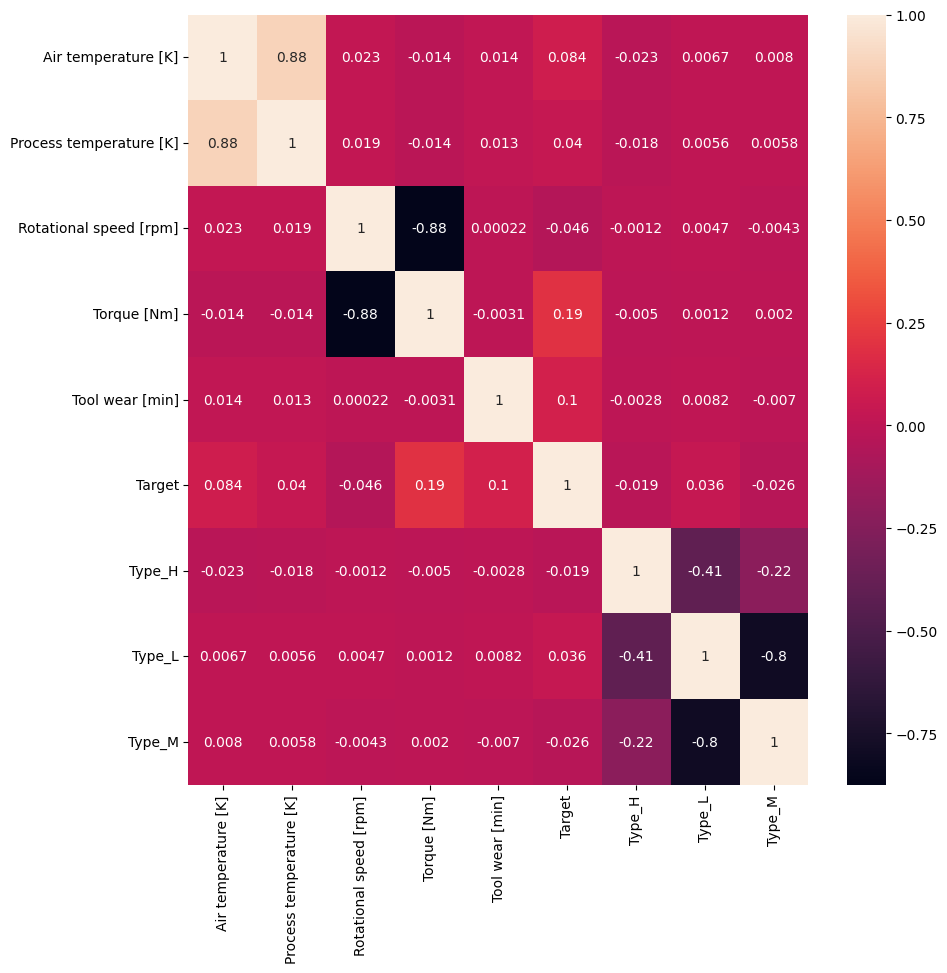

In [17]:
Corr_Observe = df.iloc[:,2:12]
Corr_Observe
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(Corr_Observe.corr(),ax=ax,annot=True)
plt.show()

In [18]:
df

UDI Product ID  Air temperature [K]  Process temperature [K]  \
0         1     M14860                298.1                    308.6   
1         2     L47181                298.2                    308.7   
2         3     L47182                298.1                    308.5   
3         4     L47183                298.2                    308.6   
4         5     L47184                298.2                    308.7   
...     ...        ...                  ...                      ...   
9995   9996     M24855                298.8                    308.4   
9996   9997     H39410                298.9                    308.4   
9997   9998     M24857                299.0                    308.6   
9998   9999     H39412                299.0                    308.7   
9999  10000     M24859                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  Type_H  Type_L  Type_M  
0      No Failure       0       0       1  
1      No Failure       0       1       0  
2      No Failure       0       1       0  
3      No Failure       0       1       0  
4      No Failure       0       1       0  
...           ...     ...     ...     ...  
9995   No Failure       0       0       1  
9996   No Failure       1       0       0  
9997   No Failure       0       0       1  
9998   No Failure       1       0       0  
9999   No Failure       0       0       1  

[10000 rows x 12 columns]

In [19]:
df['Air_temperature'] = df['Air temperature [K]']
df['Process_temperature'] = df['Process temperature [K]']
df['Rotational_speed'] = df['Rotational speed [rpm]']
df['Torque'] = df['Torque [Nm]']
df['Tool_wear'] = df['Tool wear [min]']
df = df.drop(['UDI','Product ID','Target','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]'],axis=1)
df

Failure Type  Type_H  Type_L  Type_M  Air_temperature  \
0      No Failure       0       0       1            298.1   
1      No Failure       0       1       0            298.2   
2      No Failure       0       1       0            298.1   
3      No Failure       0       1       0            298.2   
4      No Failure       0       1       0            298.2   
...           ...     ...     ...     ...              ...   
9995   No Failure       0       0       1            298.8   
9996   No Failure       1       0       0            298.9   
9997   No Failure       0       0       1            299.0   
9998   No Failure       1       0       0            299.0   
9999   No Failure       0       0       1            299.0   

      Process_temperature  Rotational_speed  Torque  Tool_wear  
0                   308.6              1551    42.8          0  
1                   308.7              1408    46.3          3  
2                   308.5              1498    49.4          5  
3                   308.6              1433    39.5          7  
4                   308.7              1408    40.0          9  
...                   ...               ...     ...        ...  
9995                308.4              1604    29.5         14  
9996                308.4              1632    31.8         17  
9997                308.6              1645    33.4         22  
9998                308.7              1408    48.5         25  
9999                308.7              1500    40.2         30  

[10000 rows x 9 columns]

In [20]:
df.drop(df[df['Failure Type']=='Random Failures'].index, inplace=True)
Failure_Type_map={
    'No Failure':0,
    'Power Failure':1,
    'Tool Wear Failure':2,
    'Overstrain Failure':3,
    'Heat Dissipation Failure':4
}
df['Failure Type']=df['Failure Type'].map(Failure_Type_map)

In [21]:
x = df.iloc[:,1:9]
y = df.loc[:,'Failure Type']

In [22]:
x

Type_H  Type_L  Type_M  Air_temperature  Process_temperature  \
0          0       0       1            298.1                308.6   
1          0       1       0            298.2                308.7   
2          0       1       0            298.1                308.5   
3          0       1       0            298.2                308.6   
4          0       1       0            298.2                308.7   
...      ...     ...     ...              ...                  ...   
9995       0       0       1            298.8                308.4   
9996       1       0       0            298.9                308.4   
9997       0       0       1            299.0                308.6   
9998       1       0       0            299.0                308.7   
9999       0       0       1            299.0                308.7   

      Rotational_speed  Torque  Tool_wear  
0                 1551    42.8          0  
1                 1408    46.3          3  
2                 1498    49.4          5  
3                 1433    39.5          7  
4                 1408    40.0          9  
...                ...     ...        ...  
9995              1604    29.5         14  
9996              1632    31.8         17  
9997              1645    33.4         22  
9998              1408    48.5         25  
9999              1500    40.2         30  

[9982 rows x 8 columns]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_resample,y_resample = SMOTE(random_state=1).fit_resample(x_train, y_train)
k = StratifiedKFold(n_splits=10, shuffle=True)

def ObserveModel(pipe,title):
    observe = cross_val_score(pipe,x_train,y_train,scoring='f1_macro',cv=k,n_jobs=-1)
    print('=========='+title+'==========')
    print(observe)
    print('Mean:%.2f'%np.mean(observe))
    print('Std:%.2f'%np.std(observe))


RFC_pipe = Pipeline([('smote',SMOTE(random_state=1)),('RFC',RandomForestClassifier(random_state=1))])
ObserveModel(RFC_pipe,'Random Forest')
Gradient_Pipe = Pipeline([('smote',SMOTE(random_state=1)),('Gradient Boosting',GradientBoostingClassifier(random_state=1))])
ObserveModel(Gradient_Pipe, 'Gradient Boosting')
Xgb_pipe = Pipeline([('smote',SMOTE(random_state=1)),('Xgb',XGBClassifier(random_state=1))])
ObserveModel(Xgb_pipe,'XGBoost')


==========Random Forest==========
[0.66486819 0.58603453 0.60951246 0.69810772 0.60996817 0.65724704
 0.58453246 0.66077929 0.60243056 0.64585331]
Mean:0.63
Std:0.04
==========Gradient Boosting==========
[0.7097361  0.62073907 0.6836775  0.69998018 0.72316221 0.69645618
 0.71850459 0.67723254 0.65683956 0.67344169]
Mean:0.69
Std:0.03
==========XGBoost==========
[0.74979069 0.78517529 0.69840974 0.74537133 0.73882779 0.78689977
 0.63603508 0.72443567 0.7314106  0.72882101]
Mean:0.73
Std:0.04


In [ ]:
rfc_param={
    'n_estimators':range(100,1500),
    'max_depth':range(1,500),  
    'max_features':[0.5,0.6,0.7,0.8,0.9,1.0],
    'max_samples':[0.5,0.6,0.7,0.8,0.9,1.0]
}
RandomSearch = RandomizedSearchCV(RandomForestClassifier(random_state=1, class_weight='balanced'), rfc_param, scoring='f1_macro')
RandomSearch.fit(x_resample,y_resample)
print(RandomSearch.best_params_)
print(RandomSearch.best_score_)
y_pred = RandomSearch.best_estimator_.predict(x_test)
print(classification_report(y_test,y_pred))

{'n_estimators': 521, 'max_samples': 1.0, 'max_features': 0.7, 'max_depth': 414}
0.9952477879610608
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1928
           1       0.71      0.79      0.75        19
           2       0.06      0.12      0.08         8
           3       0.82      0.93      0.87        15
           4       0.69      0.67      0.68        27

    accuracy                           0.97      1997
   macro avg       0.66      0.70      0.67      1997
weighted avg       0.98      0.97      0.98      1997



In [ ]:
Weight = {0:1,1:2,2:3,3:1,4:1}
model = RandomForestClassifier(n_estimators=521, max_samples=1.0, max_features=0.7,max_depth=414, class_weight=Weight,random_state=1)
model.fit(x_resample,y_resample)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1928
           1       0.71      0.79      0.75        19
           2       0.06      0.12      0.08         8
           3       0.82      0.93      0.87        15
           4       0.72      0.78      0.75        27

    accuracy                           0.97      1997
   macro avg       0.66      0.72      0.69      1997
weighted avg       0.98      0.97      0.98      1997



In [ ]:
grident_param={
    'n_estimators':range(100,1000,100),
    'max_features':[0.5,0.6,0.7,0.8,0.9,1.0],
    'subsample':[0.5,0.6,0.7,0.8,0.9,1.0],
    'learning_rate':[0.01,0.03,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'random_state':[1]
}
RandomSearch = RandomizedSearchCV(GradientBoostingClassifier(), grident_param, scoring='f1_macro', n_jobs=-1)
RandomSearch.fit(x_resample,y_resample)
print(RandomSearch.best_params_)
print(RandomSearch.best_score_)
y_pred = RandomSearch.best_estimator_.predict(x_test)
print(classification_report(y_test,y_pred))

{'subsample': 0.7, 'random_state': 1, 'n_estimators': 900, 'max_features': 0.8, 'learning_rate': 0.2}
0.9959021603932451
              precision    recall  f1-score   support

           0       0.97      0.67      0.80      1928
           1       0.00      0.00      0.00        19
           2       0.01      0.62      0.03         8
           3       0.04      0.20      0.07        15
           4       0.01      0.07      0.02        27

    accuracy                           0.66      1997
   macro avg       0.21      0.31      0.18      1997
weighted avg       0.94      0.66      0.77      1997



In [ ]:
model = GradientBoostingClassifier(n_estimators=900, max_features=0.8, subsample=0.7, random_state=1, learning_rate=0.07)
model.fit(x_resample,y_resample)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1928
           1       0.76      0.84      0.80        19
           2       0.05      0.12      0.07         8
           3       0.93      0.93      0.93        15
           4       0.90      0.96      0.93        27

    accuracy                           0.98      1997
   macro avg       0.73      0.77      0.75      1997
weighted avg       0.99      0.98      0.98      1997



In [ ]:
xgb_params={
    'n_estimators':range(100,1000,100),
    'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.6,0.7,0.8,0.9,1],
    'max_depth':range(6,500),
    'learning_rate':[0.01,0.03,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'random_state':[1]
}
RandomSearch = RandomizedSearchCV(XGBClassifier(),xgb_params,cv=k,scoring='f1_macro',n_jobs=-1)
RandomSearch.fit(x_resample,y_resample)
print(RandomSearch.best_params_)
print(RandomSearch.best_score_)
y_pred = RandomSearch.best_estimator_.predict(x_test)
print(classification_report(y_test,y_pred))


{'subsample': 1, 'random_state': 1, 'n_estimators': 800, 'max_depth': 481, 'learning_rate': 0.6, 'colsample_bytree': 0.8}
0.9969393677098394
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1928
           1       0.80      0.84      0.82        19
           2       0.08      0.12      0.10         8
           3       0.88      0.93      0.90        15
           4       0.90      1.00      0.95        27

    accuracy                           0.98      1997
   macro avg       0.73      0.78      0.75      1997
weighted avg       0.99      0.98      0.99      1997



In [52]:
model = XGBClassifier(n_estimators=800, max_depth=481, subsample=1, colsample_bytree=0.8, learning_rate=0.08, random_state=1)
model.fit(x_resample, y_resample)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1928
           1       0.76      0.84      0.80        19
           2       0.08      0.12      0.10         8
           3       0.93      0.93      0.93        15
           4       0.93      1.00      0.96        27

    accuracy                           0.98      1997
   macro avg       0.74      0.78      0.76      1997
weighted avg       0.99      0.98      0.99      1997

